**DATASET DESCRIPTION**

This project uses the Crypto Scam Transaction Dataset available on Kaggle, created by Muhammad Hussnain. The dataset contains 20,000 blockchain transactions labeled as scam or non-scam.

The dataset was accessed using KaggleHub and loaded into a pandas DataFrame for analysis. It includes transaction-related attributes such as wallet age, transaction amount, gas fees, and anomaly scores.

**UNSDG Alignment**

This dataset aligns with United Nations Sustainable Development Goal (UNSDG) 16: Peace, Justice and Strong Institutions. Financial scams threaten economic stability and trust in financial systems. Detecting scam transactions helps reduce financial crime and promotes secure and transparent financial ecosystems.




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import kagglehub

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

print(" Imports ready")


 Imports ready


In [ ]:

dataset_name = "muhammadhussnain09/crypto-scam-transaction-dataset"

path = kagglehub.dataset_download(
    dataset_name,
    force_download=True
)

print("Dataset path:", path)


100%|██████████| 647k/647k [00:00<00:00, 1.04MB/s]

Extracting files...
Dataset path: /root/.cache/kagglehub/datasets/muhammadhussnain09/crypto-scam-transaction-dataset/versions/1


In [ ]:
df = pd.read_csv(path + "/crypto_scam_transaction_dataset.csv")

print(df.head())
print(df.shape)


  transaction_id   timestamp blockchain transaction_type  \
0       TX000001  1701692743        BSC             Mint   
1       TX000002  1704304572   Ethereum           Bridge   
2       TX000003  1704926484        BSC         Transfer   
3       TX000004  1702234489     Solana             Mint   
4       TX000005  1701570006        BSC             Swap   

   sender_wallet_age_days  receiver_wallet_age_days  transaction_amount_usd  \
0                     469                       769                  929.39   
1                    1076                      1238                  139.21   
2                     679                       442                  395.21   
3                    1573                      2434                 2078.90   
4                     522                       418                   72.47   

   gas_fee_usd  token_type     platform  num_prev_transactions_sender  \
0         2.76       ERC20     Coinbase                          1120   
1         9.36  St

In [ ]:
print(df.info())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_id                  20000 non-null  object 
 1   timestamp                       20000 non-null  int64  
 2   blockchain                      20000 non-null  object 
 3   transaction_type                20000 non-null  object 
 4   sender_wallet_age_days          20000 non-null  int64  
 5   receiver_wallet_age_days        20000 non-null  int64  
 6   transaction_amount_usd          20000 non-null  float64
 7   gas_fee_usd                     19400 non-null  float64
 8   token_type                      20000 non-null  object 
 9   platform                        19400 non-null  object 
 10  num_prev_transactions_sender    20000 non-null  int64  
 11  num_prev_transactions_receiver  20000 non-null  int64  
 12  avg_txn_interval_sender_min     

,timestamp,sender_wallet_age_days,receiver_wallet_age_days,transaction_amount_usd,gas_fee_usd,num_prev_transactions_sender,num_prev_transactions_receiver,avg_txn_interval_sender_min,is_cross_chain,failed_txn_ratio_sender,velocity_score,anomaly_score,is_scam
count,2.000000e+04,20000.000000,20000.000000,20000.000000,19400.000000,20000.000000,20000.000000,19400.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,1.702510e+09,604.636350,500.705800,746.684852,10.192139,1199.994100,1000.247150,240.836103,0.180000,0.142125,0.011513,0.103701,0.07250
std,1.442829e+06,599.549895,504.895455,1075.765187,9.878027,34.575635,31.521416,299.273891,0.384197,0.090152,0.052001,0.095809,0.25932
min,1.700000e+09,0.000000,0.000000,6.730000,0.360000,1073.000000,877.000000,2.600000,0.000000,0.000000,-0.200000,0.000000,0.00000
25%,1.701262e+09,174.000000,143.000000,188.902500,4.310000,1176.000000,979.000000,75.500000,0.000000,0.070000,-0.020000,0.010000,0.00000
50%,1.702508e+09,416.000000,345.000000,406.175000,7.330000,1200.000000,1000.000000,147.200000,0.000000,0.120000,0.010000,0.090000,0.00000
75%,1.703769e+09,850.000000,688.000000,854.660000,12.640000,1223.000000,1021.000000,288.900000,0.000000,0.190000,0.050000,0.170000,0.00000
max,1.705000e+09,5497.000000,4542.000000,23220.620000,241.110000,1346.000000,1130.000000,4844.700000,1.000000,0.680000,0.340000,0.540000,1.00000


In [ ]:
print(df.isnull().sum())


transaction_id                      0
timestamp                           0
blockchain                          0
transaction_type                    0
sender_wallet_age_days              0
receiver_wallet_age_days            0
transaction_amount_usd              0
gas_fee_usd                       600
token_type                          0
platform                          600
num_prev_transactions_sender        0
num_prev_transactions_receiver      0
avg_txn_interval_sender_min       600
is_cross_chain                      0
failed_txn_ratio_sender             0
velocity_score                      0
anomaly_score                       0
is_scam                             0
dtype: int64


In [ ]:
try:
    # Fill numeric missing values
    df["gas_fee_usd"] = df["gas_fee_usd"].fillna(df["gas_fee_usd"].mean())
    df["avg_txn_interval_sender_min"] = df["avg_txn_interval_sender_min"].fillna(
        df["avg_txn_interval_sender_min"].mean()
    )

    # Fill categorical
    df["platform"] = df["platform"].fillna("Unknown")

    # Drop non-useful IDs
    df.drop(["transaction_id", "timestamp"], axis=1, inplace=True)

except Exception as e:
    print(f"Error during cleaning: {e}")

finally:
    print("Cleaning done")


Error during cleaning: 'platform'
Cleaning done


In [ ]:
print(df.isnull().sum())


blockchain                        0
transaction_type                  0
sender_wallet_age_days            0
receiver_wallet_age_days          0
transaction_amount_usd            0
gas_fee_usd                       0
token_type                        0
platform                          0
num_prev_transactions_sender      0
num_prev_transactions_receiver    0
avg_txn_interval_sender_min       0
is_cross_chain                    0
failed_txn_ratio_sender           0
velocity_score                    0
anomaly_score                     0
is_scam                           0
dtype: int64


In [ ]:
df = pd.get_dummies(df, drop_first=True)

print(" Encoding done")
print(df.shape)


 Encoding done
(20000, 29)


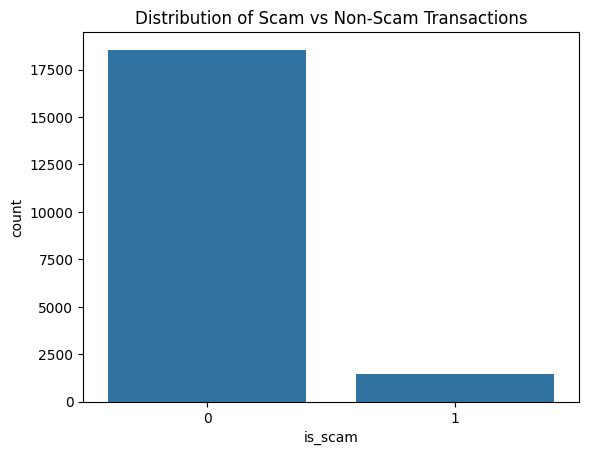

In [ ]:
# This plot shows how many scam vs non-scam transactions exist
# It helps us detect class imbalance

sns.countplot(x=df["is_scam"])
plt.title("Distribution of Scam vs Non-Scam Transactions")
plt.show()


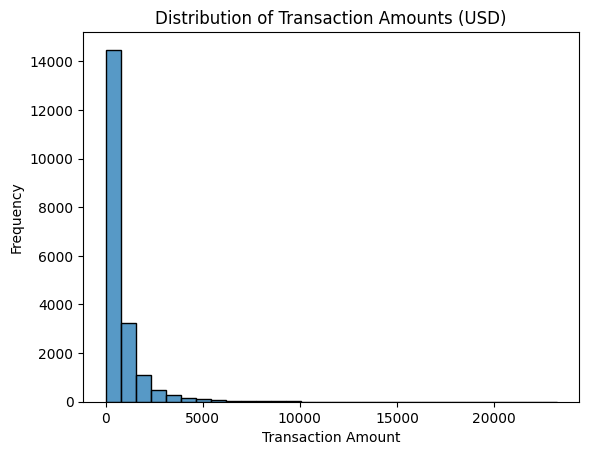

In [ ]:
# This histogram shows how transaction amounts are distributed
# Helps identify skewness and outliers

sns.histplot(df["transaction_amount_usd"], bins=30)

plt.title("Distribution of Transaction Amounts (USD)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")

plt.show()


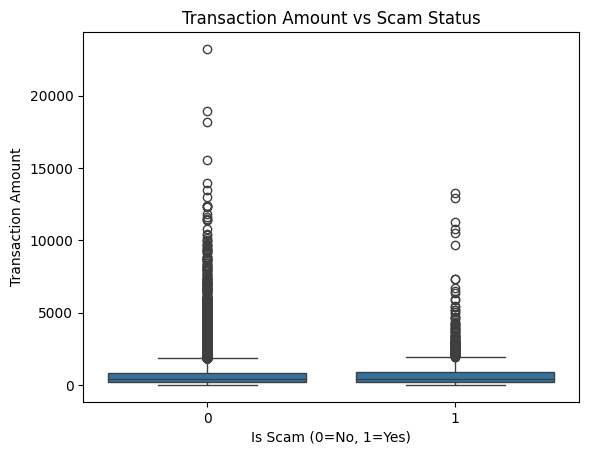

In [ ]:
# Boxplot comparing transaction amount for scam vs non-scam
# Helps see if scams involve larger or smaller amounts

sns.boxplot(
    x=df["is_scam"],
    y=df["transaction_amount_usd"]
)

plt.title("Transaction Amount vs Scam Status")
plt.xlabel("Is Scam (0=No, 1=Yes)")
plt.ylabel("Transaction Amount")

plt.show()


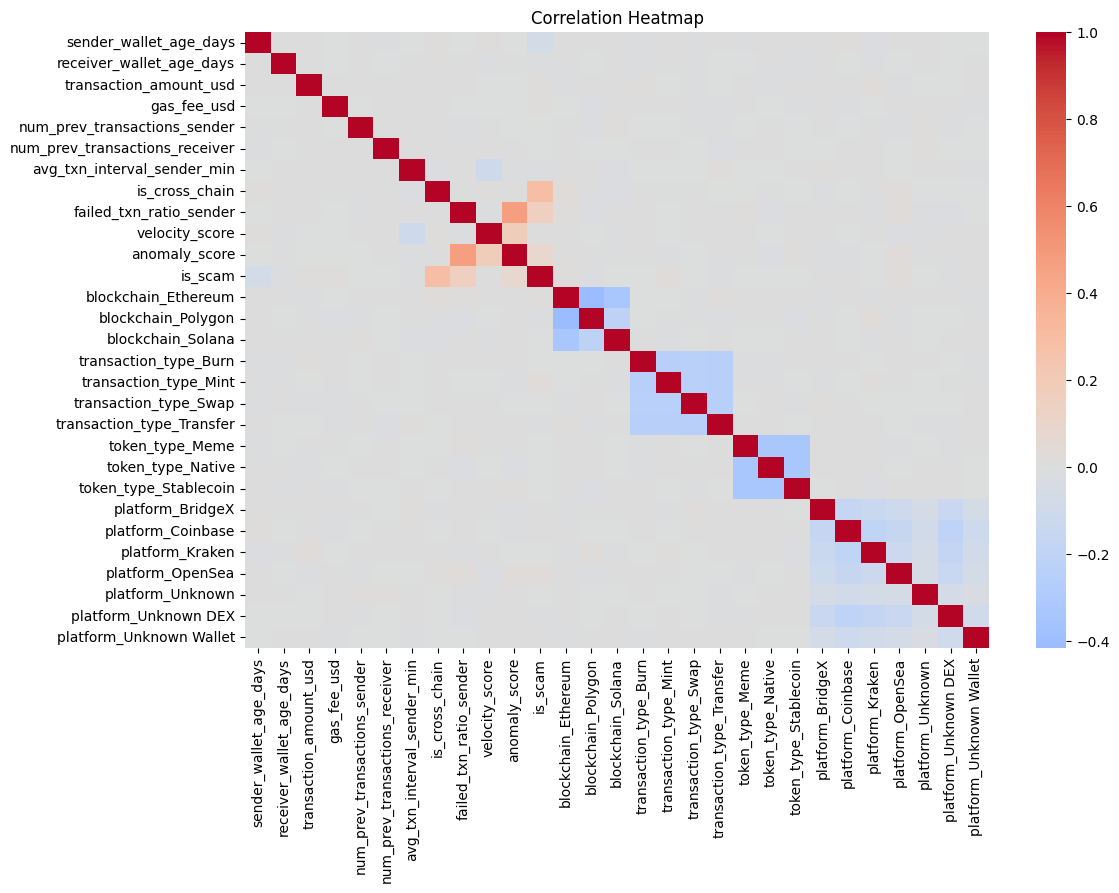

In [ ]:
# Correlation heatmap to see relationships between features
# Especially useful to check correlation with 'is_scam'

plt.figure(figsize=(12,8))

sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Separate features (X) and target (y)
# Target = is_scam

X = df.drop("is_scam", axis=1)
y = df["is_scam"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (20000, 28)
y shape: (20000,)


In [ ]:
# Split data into training and testing sets
# Stratify keeps scam ratio same in both sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (16000, 28)
Testing size: (4000, 28)


In [ ]:
# Scale features so they have similar ranges
# Helps neural network learn better

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling work complete")


Scaling work complete


In [ ]:
# Multi-Layer Perceptron (Neural Network)
# 2 hidden layers: 64 and 32 neurons
# ReLU activation, Adam optimizer (default)

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

print(" Neural Network SUCCESSFULLY trained")


 Neural Network SUCCESSFULLY trained


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Make predictions on test set

y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate performance

print("Neural Network Accuracy:",
      accuracy_score(y_test, y_pred_mlp))

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_mlp))


Neural Network Accuracy: 0.89775

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      3710
           1       0.27      0.24      0.25       290

    accuracy                           0.90      4000
   macro avg       0.60      0.59      0.60      4000
weighted avg       0.89      0.90      0.89      4000



A Multi-Layer Perceptron with two hidden layers (64 and 32 neurons) was trained. The model achieved high overall accuracy, but recall for scam detection was low. This indicates the model performs well on normal transactions but misses many scams.

In [ ]:
# SMOTE balances scam vs non-scam in training data

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(
    X_train, y_train
)

print("After SMOTE:")
print(y_train_sm.value_counts())


After SMOTE:
is_scam
0    14840
1    14840
Name: count, dtype: int64


In [ ]:
# Logistic Regression on balanced data

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train_sm, y_train_sm)

print(" Logistic Regression trained")


 Logistic Regression trained


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predictions on test set

y_pred_lr = lr.predict(X_test)

# Evaluation

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.87975

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      3710
           1       0.23      0.27      0.25       290

    accuracy                           0.88      4000
   macro avg       0.58      0.60      0.59      4000
weighted avg       0.89      0.88      0.88      4000



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    random_state=42
)

dt.fit(X_train_sm, y_train_sm)

print(" Decision Tree trained")


 Decision Tree trained


In [ ]:
# Predictions

y_pred_dt = dt.predict(X_test)

# Evaluation

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_dt))

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7925

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      3710
           1       0.23      0.80      0.36       290

    accuracy                           0.79      4000
   macro avg       0.61      0.80      0.62      4000
weighted avg       0.93      0.79      0.84      4000



Logistic Regression and Decision Tree models were trained on SMOTE-balanced data. Logistic Regression achieved higher accuracy but relatively low scam recall.

The Decision Tree achieved lower overall accuracy but significantly higher scam recall, making it more effective for fraud detection.

In [ ]:
# GridSearch tries multiple parameter combinations
# to find the best-performing Decision Tree

from sklearn.model_selection import GridSearchCV

# Define parameter options to test
param_grid_dt = {
    "max_depth":[4,6,8],
    "min_samples_split":[5,10,20]
}

# GridSearch with cross-validation
# scoring="recall" focuses on catching scams
grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=3,
    scoring="recall"
)

# Fit on SMOTE-balanced training data
grid_dt.fit(X_train_sm, y_train_sm)

# Show best parameters
print("Best Decision Tree parameters:",
      grid_dt.best_params_)


Best Decision Tree parameters: {'max_depth': 8, 'min_samples_split': 20}


In [ ]:
# Scaling SMOTE data for Logistic Regression tuning
# Logistic regression benefits from scaled features

scaler2 = StandardScaler()

X_train_sm_scaled = scaler2.fit_transform(X_train_sm)


In [ ]:
# Hyperparameter tuning for Logistic Regression
# Using scaled data for better convergence

param_grid_lr = {
    "C":[0.01, 0.1, 1, 10]
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=5000),
    param_grid_lr,
    cv=3,
    scoring="recall"
)

# Fit on scaled SMOTE data
grid_lr.fit(X_train_sm_scaled, y_train_sm)

print("Best Logistic parameters:",
      grid_lr.best_params_)


Best Logistic parameters: {'C': 10}


In [ ]:
# Select top 10 features that best relate to target
# Using ANOVA F-test

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(
    score_func=f_classif,
    k=10
)

X_selected = selector.fit_transform(X, y)

print("Selected feature shape:",
      X_selected.shape)


Selected feature shape: (20000, 10)


In [ ]:
# Get names of selected features
selected_features = X.columns[
    selector.get_support()
]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['sender_wallet_age_days', 'receiver_wallet_age_days',
       'transaction_amount_usd', 'gas_fee_usd', 'is_cross_chain',
       'failed_txn_ratio_sender', 'anomaly_score', 'blockchain_Ethereum',
       'transaction_type_Mint', 'platform_OpenSea'],
      dtype='object')


GridSearchCV was used to find optimal hyperparameters for both models. Feature selection using SelectKBest identified the most influential variables, reducing the dataset to the top 10 features.

Feature selection improved scam detection performance and reduced model complexity.

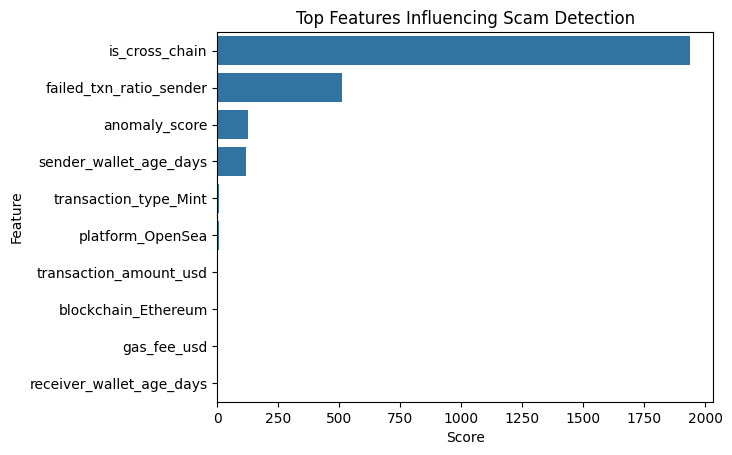

In [ ]:
# Get feature scores from SelectKBest
scores = selector.scores_

# Create DataFrame
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Score": scores
})

# Sort by importance
feature_scores = feature_scores.sort_values(
    by="Score",
    ascending=False
)

# Plot top 10 features
sns.barplot(
    x="Score",
    y="Feature",
    data=feature_scores.head(10)
)

plt.title("Top Features Influencing Scam Detection")
plt.show()


In [ ]:
# Create dataset using only selected features

X_final = df[selected_features]
y_final = df["is_scam"]

# Train-test split again
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    stratify=y_final,
    random_state=42
)


In [ ]:
# Balance final training data

smote = SMOTE(random_state=42)

Xf_train_sm, yf_train_sm = smote.fit_resample(
    Xf_train, yf_train
)

print("Balanced classes:")
print(yf_train_sm.value_counts())


Balanced classes:
is_scam
0    14840
1    14840
Name: count, dtype: int64


In [ ]:
# Final Logistic Regression with tuned parameter

final_lr = LogisticRegression(
    C=10,
    max_iter=5000
)

final_lr.fit(Xf_train_sm, yf_train_sm)

print("Final Logistic trained")


Final Logistic trained


In [ ]:
# Predictions

yf_pred_lr = final_lr.predict(Xf_test)

# Metrics

print("Final Logistic Accuracy:",
      accuracy_score(yf_test, yf_pred_lr))

print("\nClassification Report:\n",
      classification_report(yf_test, yf_pred_lr))


Final Logistic Accuracy: 0.751

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.76      0.85      3710
           1       0.18      0.69      0.29       290

    accuracy                           0.75      4000
   macro avg       0.57      0.72      0.57      4000
weighted avg       0.91      0.75      0.81      4000



In [ ]:
# Final Decision Tree with tuned parameters

final_dt = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=20,
    random_state=42
)

final_dt.fit(Xf_train_sm, yf_train_sm)

print("Final Decision Tree trained")


Final Decision Tree trained


In [ ]:
# Predictions

yf_pred_dt = final_dt.predict(Xf_test)

# Metrics

print("Final Decision Tree Accuracy:",
      accuracy_score(yf_test, yf_pred_dt))

print("\nClassification Report:\n",
      classification_report(yf_test, yf_pred_dt))


Final Decision Tree Accuracy: 0.82775

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      3710
           1       0.27      0.80      0.40       290

    accuracy                           0.83      4000
   macro avg       0.62      0.81      0.65      4000
weighted avg       0.93      0.83      0.86      4000



In [ ]:
# Create comparison table

comparison = pd.DataFrame({
    "Model":["Logistic Regression","Decision Tree"],
    "Accuracy":[
        accuracy_score(yf_test, yf_pred_lr),
        accuracy_score(yf_test, yf_pred_dt)
    ],
    "Precision":[
        classification_report(yf_test, yf_pred_lr, output_dict=True)["1"]["precision"],
        classification_report(yf_test, yf_pred_dt, output_dict=True)["1"]["precision"]
    ],
    "Recall":[
        classification_report(yf_test, yf_pred_lr, output_dict=True)["1"]["recall"],
        classification_report(yf_test, yf_pred_dt, output_dict=True)["1"]["recall"]
    ],
    "F1":[
        classification_report(yf_test, yf_pred_lr, output_dict=True)["1"]["f1-score"],
        classification_report(yf_test, yf_pred_dt, output_dict=True)["1"]["f1-score"]
    ]
})

print(comparison)


                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression   0.75100   0.180254  0.686207  0.285509
1        Decision Tree   0.82775   0.268293  0.796552  0.401390


After tuning and feature selection, the Decision Tree outperformed Logistic Regression in scam detection.

Although Logistic Regression had reasonable accuracy, the Decision Tree achieved much higher recall for scams, making it the preferred model for fraud detection scenarios.